# Melody Accompaniment Separation
**AUTHOR: Shayenne da Luz Moura**


# Comparing perceptual results

This notebook was created to present the melody extraction based on a annotaded polyphonic audio file and based on the contours given by Melodia (Salamon, 2012).

In [1]:
# Print 
from __future__ import print_function

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display
# Functions of time
import time
# Open annotation file
import csv
# Melodia vamp plugin
import vamp
# Scientific python
import scipy
# Get signal processing functions
import scipy.signal as signal
# Make melodic mask
import src.core as mask

## Default parameters

In [2]:
# Parameters to calculate the spectrogram
sr = 44100                  # Sample rate
win_length = 2048           # FFT Window size 
fb = sr/win_length          # FFT bins
fs = win_length/sr          # Frame size 
hop_length = win_length/4   # Hop size

Choose the audio file and the annotation to make the melodic accompainment and comment the others.

In [3]:
# Examples from MedleyDB


# Example 1 - Woman Singer
audio_path = 'MedleyDB/Audio/LizNelson_Rainfall/LizNelson_Rainfall_MIX.wav'
# Annotation 1
annot_path = "MedleyDB/Annotations/Melody_Annotations"\
           +"/MELODY1/LizNelson_Rainfall_MELODY1.csv"


"""
# Example 2 - Guitar solo
audio_path = '../../MedleyDB/Audio/ChrisJacoby_BoothShotLincoln/'\
            +'ChrisJacoby_BoothShotLincoln_MIX.wav'
# Annotation 2
annot_path = "../../MedleyDB/Annotations/Melody_Annotations"\
            +"/MELODY1/ChrisJacoby_BoothShotLincoln_MELODY1.csv"
"""

"""
# Example 3 - Man Singer
audio_path = '../../MedleyDB/Audio/Debussy_LenfantProdigue/'\
            +'Debussy_LenfantProdigue_MIX.wav'
# Annotation 
annot_path = "../../MedleyDB/Annotations/Melody_Annotations"\
            +"/MELODY1/Debussy_LenfantProdigue_MELODY1.csv"
"""

"""
# Example 4 - Orchestra Example
audio_path = '../../MedleyDB/Audio/MusicDelta_Beethoven/'\
            +'MusicDelta_Beethoven_MIX.wav'
# Annotation 
annot_path = "../../MedleyDB/Annotations/Melody_Annotations"\
            +"/MELODY1/MusicDelta_Beethoven_MELODY1.csv"
"""

"""
# Example 5 - Punk
audio_path = '../../MedleyDB/Audio/MusicDelta_Punk/'\
            +'MusicDelta_Punk_MIX.wav'
# Annotation 
annot_path = "../../MedleyDB/Annotations/Melody_Annotations"\
            +"/MELODY1/MusicDelta_Punk_MELODY1.csv"
"""

'\n# Example 5 - Punk\naudio_path = \'../../MedleyDB/Audio/MusicDelta_Punk/\'            +\'MusicDelta_Punk_MIX.wav\'\n# Annotation \nannot_path = "../../MedleyDB/Annotations/Melody_Annotations"            +"/MELODY1/MusicDelta_Punk_MELODY1.csv"\n'

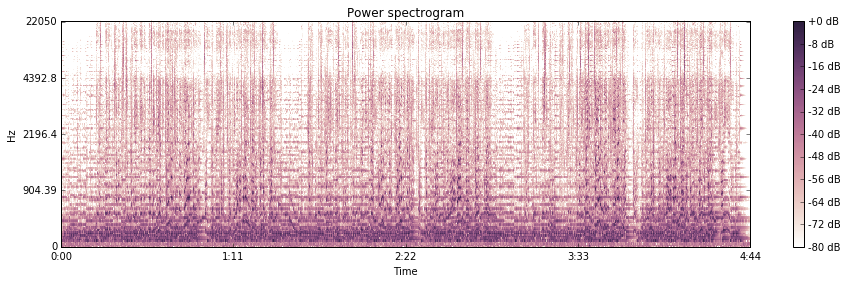

In [4]:
# Load audio file and calculate its STFT
audio, sr = librosa.load(audio_path, sr=sr)
D = librosa.stft(audio, window=signal.cosine)

# Display the power spectrogram 
plt.figure(figsize=(13,4))
librosa.display.specshow(librosa.logamplitude(np.abs(D)**2, ref_power=np.max),\
                         sr=sr, y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

## Creating melodic mask based on annotation

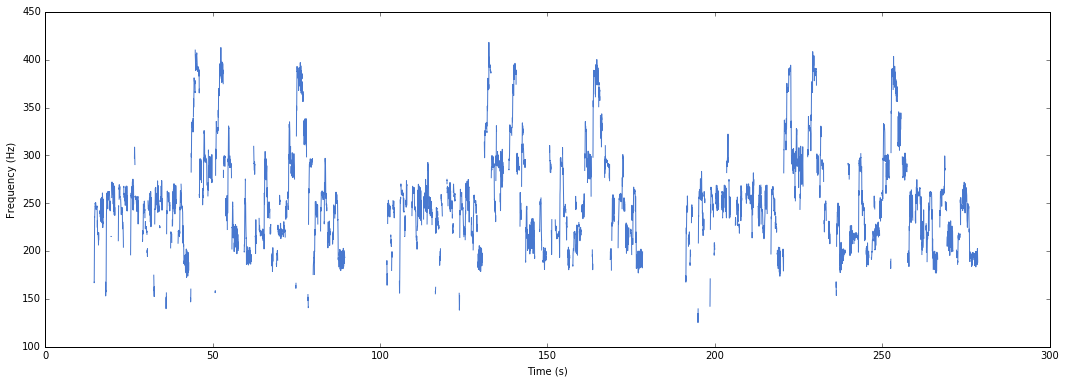

In [5]:
melody = []
timestamps = []

with open(annot_path) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        timestamps.append(float(row[0]))
        melody.append(float(row[1]))
        
# Append element to make size equal of spectrogram
melody.append(0)
timestamps.append(0)

# None to values less equals 0
melody_pos = melody[:].copy()
for i in range(len(melody_pos)):
    if melody_pos[i] <= 0:
        melody_pos[i] = None

# Plot melodic line from annotation
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_pos)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [6]:
del melody, timestamps

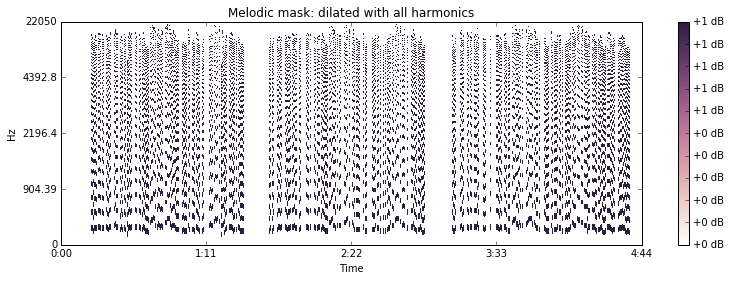

In [7]:
# Generate a melodic mask based on Annotation by MedleyDB
specAnnotation = mask.generateMelodicMask(D, melody_pos, n_harm=36)
plt.figure(figsize=(13,4))
librosa.display.specshow(specAnnotation, y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Melodic mask: dilated with all harmonics')
plt.show()

In [8]:
# Find start notes and increment spectral information 
spectrum, specFind, specDilated = mask.hitMissDilateMask(specAnnotation)

In [9]:
del spectrum, specFind

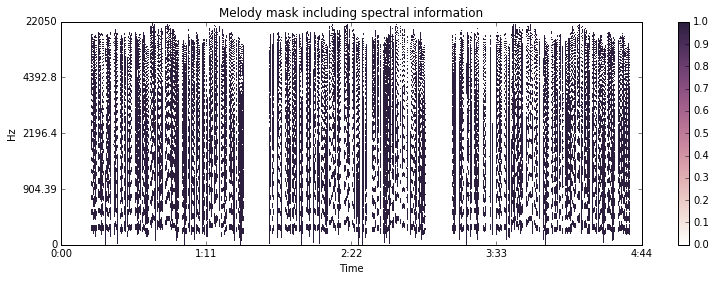

In [10]:
# Plot the results (only to see)
plt.figure(figsize=(13,4))
librosa.display.specshow(specDilated, sr=sr, y_axis='log', x_axis='time')
plt.colorbar() 
plt.title('Melody mask including spectral information')
plt.show()

In [11]:
# Getting masks harmonic and percussive
mask_H, mask_P = librosa.decompose.hpss(D, mask=True)
print ("Percussive mask generated...")

Percussive mask generated...


In [12]:
del mask_H

In [13]:
specPerc = np.maximum(np.multiply(specDilated, mask_P), specAnnotation)

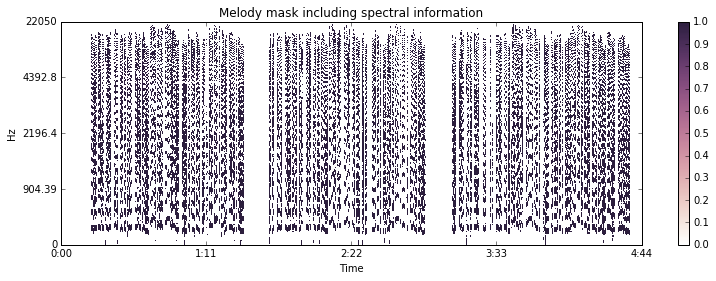

In [14]:
# Plot the results (only to see)
plt.figure(figsize=(13,4))
librosa.display.specshow(specPerc, sr=sr, y_axis='log', x_axis='time')
plt.colorbar() 
plt.title('Melody mask including spectral information')
plt.show()

## Results

Now you can save all the reconstructions and listen the results to compare perceptually.

In [15]:
# Save the audio signal melodic dilated
y_m = librosa.core.istft(specAnnotation.astype(float)*D)
librosa.output.write_wav('output_annot_melody.wav', y_m, sr, norm=False)
del y_m

In [16]:
# Save the melodic audio signal dilated with hit and miss
y_m_d = librosa.core.istft(specDilated.astype(float)*D)
librosa.output.write_wav('output_annot_melodyDilated.wav', y_m_d, sr, norm=False)
del y_m_d

In [17]:
# Save the melodic audio signal dilated with hit and miss only percussive elements
y_m_p = librosa.core.istft(specPerc.astype(float)*D)
librosa.output.write_wav('output_annot_melodyPerc.wav', y_m_p, sr, norm=False)
del y_m_p

In [18]:
# Save the accompainment audio signal 
accomp = 1 - specDilated
y_a_d = librosa.core.istft(accomp.astype(float)*D)
librosa.output.write_wav('output_annot_accompainment.wav', y_a_d, sr, norm=False)
del y_a_d

In [19]:
# Clear memory to avoid memory error
del specAnnotation
del specDilated
del accomp
del mask_P
del specPerc

## Creating melodic mask based on Melodia contours

In [20]:
# parameter values are specified by providing a dicionary to the 
# optional "parameters" parameter:
params = {"minfqr": 100.0, "maxfqr": 800.0, "voicing": 0.2, "minpeaksalience": 0.0}

data = vamp.collect(audio, sr, "mtg-melodia:melodia", parameters=params)
hop, melody = data['vector']
melody = melody.tolist()
melody= melody[::2] # Devolve f0s para cada frame - aqui reduz 2, na funcao reduz 2
melody.append(0)

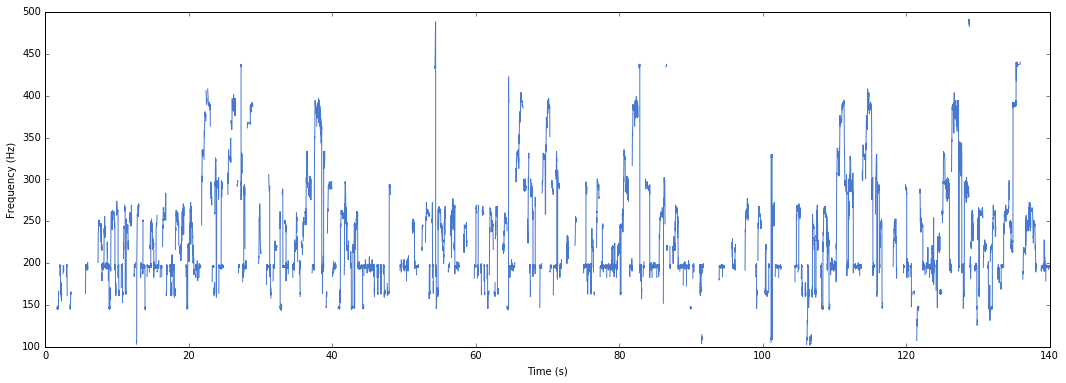

In [21]:
# A clearer option is to get rid of the negative values before plotting
melody_pos = melody[:].copy()
timestamps = 8 * 128/44100.0 + np.arange(len(melody_pos)) * (128/44100.0)

for i in range(len(melody_pos)):
    if melody_pos[i] <= 0:
        melody_pos[i] = None
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_pos)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [22]:
del data, melody, timestamps

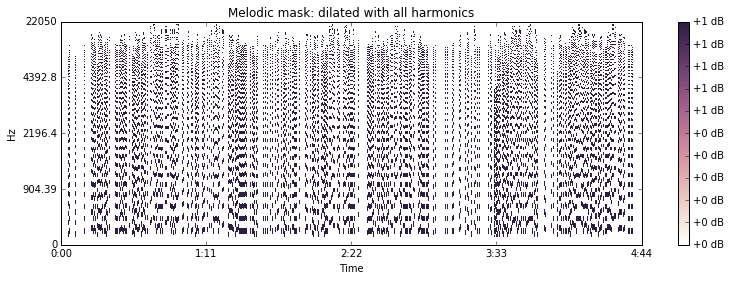

In [23]:
# Generate a melodic mask based on Melodia contours 
specMelodia = mask.generateMelodicMask(D, melody_pos, n_harm=36)
plt.figure(figsize=(13,4))
librosa.display.specshow(specMelodia, y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Melodic mask: dilated with all harmonics')
plt.show()

In [24]:
# Find start notes and increment spectral information 
spectrum, specFind, specDilated = mask.hitMissDilateMask(specMelodia)

In [25]:
del spectrum, specFind

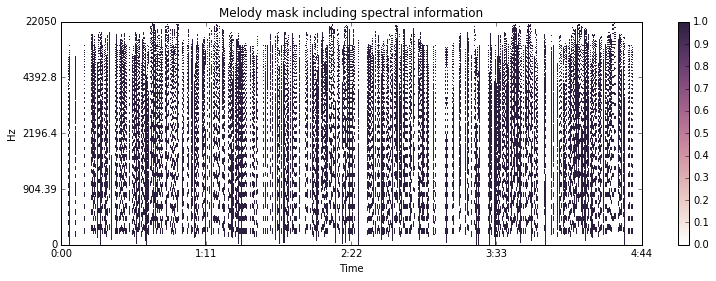

In [26]:
# Plot the results (only to see)
plt.figure(figsize=(13,4))
librosa.display.specshow(specDilated, sr=sr, y_axis='log', x_axis='time')
plt.colorbar() 
plt.title('Melody mask including spectral information')
plt.show()

In [27]:
# Getting masks harmonic and percussive
mask_H, mask_P = librosa.decompose.hpss(D, mask=True)
print ("Percussive mask generated...")

Percussive mask generated...


In [28]:
del mask_H

In [29]:
specPerc = np.maximum(np.multiply(specDilated, mask_P), specMelodia)

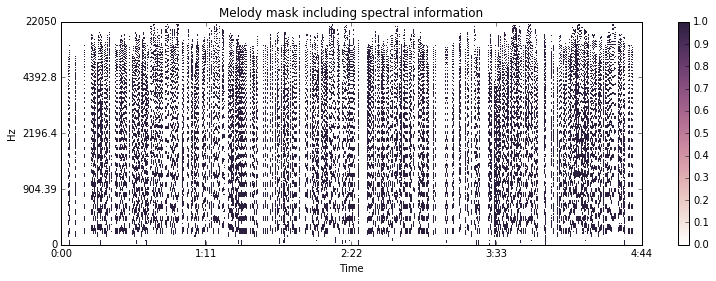

In [30]:
# Plot the results (only to see)
plt.figure(figsize=(13,4))
librosa.display.specshow(specPerc, sr=sr, y_axis='log', x_axis='time')
plt.colorbar() 
plt.title('Melody mask including spectral information')
plt.show()

## Results

Now you can save all the reconstructions and listen the results to compare perceptually.

In [31]:
# Save the audio signal melodic dilated
y_m = librosa.core.istft(specMelodia.astype(float)*D)
librosa.output.write_wav('output_melodia_melody.wav', y_m, sr, norm=False)
del y_m

In [32]:
# Save the melodic audio signal dilated with hit and miss
y_m_d = librosa.core.istft(specDilated.astype(float)*D)
librosa.output.write_wav('output_melodia_melodyDilated.wav', y_m_d, sr, norm=False)
del y_m_d

In [33]:
# Save the melodic audio signal dilated with hit and miss only percussive elements
y_m_p = librosa.core.istft(specPerc.astype(float)*D)
librosa.output.write_wav('output_melodia_melodyPerc.wav', y_m_p, sr, norm=False)
del y_m_p

In [34]:
# Save the accompainment audio signal 
accomp = 1 - specDilated
y_a_d = librosa.core.istft(accomp.astype(float)*D)
librosa.output.write_wav('output_melodia_accompainment.wav', y_a_d, sr, norm=False)
del y_a_d

In [35]:
# Clear memory to avoid memory error
del specMelodia
del specDilated
del accomp
del mask_P
del specPerc